In [1]:
from bertopic import BERTopic
from top2vec import Top2Vec
from sklearn.datasets import fetch_20newsgroups
from unicodedata import normalize
from tqdm.notebook import tqdm
from glob import glob
import spacy
import pandas as pd
import numpy as np
from unidecode import unidecode

2022-11-25 02:20:44.051198: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-25 02:20:44.220278: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-25 02:20:44.238184: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-25 02:20:44.238197: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

In [4]:
path_name = "/home/crazyjeannot/Downloads/dhai_intensive_week-main/data_annotated/*.csv"
path_test = "data_annotated/Gary-Romain_La-promesse-de-l-aube.csv"

In [5]:
def get_text_surronding_each_per(df_test):
    dict_per_text_surronding = {}
    str_base = '_'
    list_per_vue = []
    list_text = []
    list_gender = []

    for index, row in df_test.iterrows():
        per_courant = str_base.join(index.split('_')[:3])
        if per_courant not in list_per_vue:
            if len(list_text)>1:
                dict_per_text_surronding[per_avant]=str_base.join(list_text)
            list_text = []
            list_text.append(row['text_surronding'])
            list_gender.append(row['Gender'])
            list_per_vue.append(per_courant)
            
        else:
            list_text.append(row['text_surronding'])
            
        per_avant = per_courant
    dict_per_text_surronding[per_avant]=str_base.join(list_text)
    return dict_per_text_surronding, list_gender

In [6]:
def mouli_preds(path_name):
    list_gender_main = []
    dict_per_text_surronding_main = {}
    
    
    for doc in tqdm(glob(path_name)):
        doc_name = doc.split('/')[6].split('.csv')[0]
        print(doc_name)
        
        df_courant = pd.read_csv(doc, sep = ',', encoding_errors= 'replace')#encoding='latin')# 'ISO-8859-1'      
        df_courant.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
        df_courant.set_index("index", inplace = True)
        df_courant = df_courant[(df_courant.Gender == 'female') | (df_courant.Gender == 'Female') | (df_courant.Gender == 'male') | (df_courant.Gender == 'Male')]
        #df_test = df_test.replace(np.nan, 0)

        df_courant['Gender'] = ['Female' if (elem == 'female') | (elem == 'Female') else 'Male' for elem in df_courant['Gender']]
        
        dict_per_text_surronding, list_gender = get_text_surronding_each_per(df_courant)
        list_gender_main.append(list_gender)
        dict_per_text_surronding_main.update(dict_per_text_surronding)

    return dict_per_text_surronding_main, list_gender_main

In [7]:
dict_per_text_surronding_main, list_gender_main = mouli_preds(path_name)

  0%|          | 0/83 [00:00<?, ?it/s]

Balzac-Honore-de_Modeste-Mignon
Flaubert-Gustave_L-Education-sentimentale
Simenon-Georges_L-Affaire-Saint-Fiacre
Quignard-Pascal_L-enfant-d-Ingolstadt
Flaubert-Gustave_Salammbo
Hugo-Victor_Les-Miserables
Janin-Jules_L-Ane-mort-et-la-femme-guillotinee
Colette_Le-Ble-en-herbe
Guy-de-Maupassant_Pierre-et-Jean
Dumas-Alexandre_Olympe-de-Cleves
Balzac-Honore-de_Le-Pere-Goriot
Sand-George_Contes-d-une-grand-mere
Sand-George_Valentine
Feval-Paul_Une-histoire-de-revenants
Zevaco-Michel_La-Marquise-de-Pompadour
Daudet-Alphonse_L-Immortel
Nothomb-Amelie_Tuer-le-pere
Guy-de-Maupassant_Bel-ami
Gay-Sophie_Anatole
Villard-Marc_Rebelles-de-la-nuit
Sarraute-Nathalie_Ici
Proust-Marcel_Le-Cote-de-Guermantes
Bovet-Marie-Anne-de_Apres-le-divorce
Sand-George_Monsieur-Sylvestre
Quignard-Pascal_Terrasse-a-Rome
Yourcenar-Marguerite_L-Oeuvre-Au-Noir
Colette_La-retraite-sentimentale
Colette_Claudine-a-l-ecole
Gary-Romain_La-promesse-de-l-aube
Balzac-Honore-de_Beatrix
Le-Linda_Les-Evangiles-du-crime
Sand-George_M

In [8]:
len(dict_per_text_surronding_main)

816

In [8]:
conteur_male, conteur_female = 0, 0
for elem in list_gender_main:
    for gender in elem:
        if gender == 'Female':
            conteur_female +=1
        else:
            if gender == 'Male':
                conteur_male +=1

In [9]:
conteur_male

448

In [10]:
conteur_female

368

In [11]:
from nltk.tokenize import word_tokenize

In [12]:
import pickle

In [34]:
def tokenise_dict_text(dict_main):
    corpus_list_tokens = []
    list_per = []
    for key, value in tqdm(dict_main.items()):
        tokens = word_tokenize(value, language="french")
        tokens = [unidecode(elem).lower() for elem in tokens]
        corpus_list_tokens.append(tokens)
        list_per.append(key)
    return corpus_list_tokens, list_per

In [ ]:
corpus_list_tokens, list_per = tokenise_dict_text(dict_per_text_surronding_main)

In [ ]:
corpus_list_tokens

In [ ]:
model = pickle.load(open('model.pkl','rb'))

In [ ]:
vec_list = []

for per in tqdm(corpus_list_tokens):
    inferred_vector = model.infer_vector(per)
    vec_list.append(inferred_vector)

In [ ]:
len(vec_list[0])

In [ ]:
data_df = pd.DataFrame(list(zip(list_per, vec_list)), columns=['character', "vecteur"])

data_df

In [ ]:
columns = [i for i in range(0,600)]

In [ ]:
test = list(data_df['vecteur'].values)

In [ ]:
df_doc2vec = pd.DataFrame(data=test, columns=columns)

In [ ]:
df_doc2vec['index'] = list(data_df['character'])

In [7]:
def retrieve_gender(list_gender_main):
    list_gender = []
    for elem in list_gender_main:
        for gender in elem:
            list_gender.append(gender)
    return list_gender

In [ ]:
list_gender = retrieve_gender(list_gender_main)

In [284]:
df_doc2vec['gender'] = list_gender

In [285]:
df_doc2vec.set_index("index", inplace = True)

In [286]:
df_doc2vec.to_csv(r'data_gendered_doc2vec.csv', index = True)

In [ ]:
path_name

#### Get All Corpora

In [4]:
path_name = "/home/crazyjeannot/Downloads/dhai_intensive_week-main/data/PER_surronding_tokens/*.csv"

In [5]:
def get_text_surronding_each_per(df_test):
    dict_per_text_surronding = {}
    str_base = '_'
    list_per_vue = []
    list_text = []

    for index, row in df_test.iterrows():
        per_courant = str_base.join(index.split('_')[:3])
        if per_courant not in list_per_vue:
            if len(list_text)>1:
                dict_per_text_surronding[per_avant]=str_base.join(list_text)
            list_text = []
            list_text.append(row['text_surronding'])
            list_per_vue.append(per_courant)
            
        else:
            list_text.append(row['text_surronding'])
            
        per_avant = per_courant
    dict_per_text_surronding[per_avant]=str_base.join(list_text)
    return dict_per_text_surronding

In [6]:
def mouli_preds(path_name):
    dict_per_text_surronding_main = {}
    
    
    for doc in tqdm(glob(path_name)):
        doc_name = doc.split('/')[7].split('.csv')[0]
        print(doc_name)
        
        df_courant = pd.read_csv(doc, sep = ',', encoding_errors= 'replace')#encoding='latin')# 'ISO-8859-1'      
        df_courant.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
        df_courant.set_index("index", inplace = True)
        
        dict_per_text_surronding = get_text_surronding_each_per(df_courant)
        dict_per_text_surronding_main.update(dict_per_text_surronding)

    return dict_per_text_surronding_main

In [7]:
dict_per_text_surronding_main = mouli_preds(path_name)

  0%|          | 0/2772 [00:00<?, ?it/s]

Glady-Alberic_Male-et-femelle
Belot-Adolphe_Le-drame-de-la-rue-de-la-paix
Mirabeau-Marie-Le-Harivel-de-Gonneville_Ctesse-de-Mirabeau-Jane-et-Germaine-Voyages-d-un-capitaine
Delly_Le-secret-de-la-Luzette
Beauvoir-Simone-de_La-force-des-choses
Rufin-Jean-Christophe_Rouge-Bresil
Carrere-Emmanuel_D-autres-vies-que-la-mienne
Dumas-Alexandre_Le-docteur-mysterieux
Sand-George_La-petite-Fadette
Gide-Andre_Voyage-au-Congo
Despentes-Virginie_Apocalypse-bebe
Mirbeau-Octave_Sebastien-Roch
Gaude-Laurent_Les-Oliviers-du-Negus
Chapus-Eugene_Les-soirees-de-Chantilly
Romains-Jules_Les-copains
Fabre-Ferdinand_Les-Courbezon
Gastyne-Jules-de_Le-lys-noir
Stolz-Madame-de_Violence-et-bonte
Mere-Elisabeth-Brossin-de_Le-Parc-aux-Cerfs-ou-Histoire-secrete-des-jeunes-demoiselles-qui-y-ont-ete-renfermees
Pergaud-Louis_De-Goupil-a-Margot
Rolin-Olivier_Bar-des-flots-noirs
Balzac-Honore-de_Maitre-Cornelius
Sue-Eugene_Le-morne-au-diable
Volodine-Antoine_Le-nom-des-singes
Tournier-Michel_Gilles-et-Jeanne
Bealu-Marcel_

Bergounioux-Pierre_Geologies
Courcy-Alfred-de_Le-Roman-cache
Leblanc-Maurice_Le-Bouchon-de-cristal
Vignon-Claude_Une-femme-romanesque-Adrien-Malaret-L-Exemple
Rolin-Dominique_Lettre-au-vieil-homme
Michon-Pierre_Vie-de-Joseph-Roulin
Balzac-Honore-de_Le-Requisitionnaire
Claudel-Philippe_L-Enquete
San-Antonio_Le-loup-habille-en-grand-mere
Dumas-Alexandre_Memoires-d-une-aveugle
Chavette-Eugene_La-conquete-d-une-cuisiniere
San-Antonio_Fleur-de-nave-vinaigrette
Jonquet-Thierry_la-bete-et-la-belle
Djian-Philippe_Impardonnables
Beigbeder-Frederic_Windows-on-the-World
Gavalda-Anna_L-echappee-belle
Balzac-Honore-de_Physiologie-du-mariage
Sarraute-Nathalie_disent-les-imbeciles
Greville-Henry_Les-epreuves-de-Raissa
Eyma-Xavier_Le-Medaillon
Feuillet-Octave_Histoire-de-Sibylle
Parfait-Paul_L-Agent-secret
Simenon-Georges_Maigret-Lognon-et-les-gangsters
Allais-Alphonse_Ne-nous-frappons-pas
Robert-Adrien_Le-combat-de-l-honneur
Leroux-Gaston_La-double-vie-de-Theophraste-Longuet
Feval-Paul_Les-Compagnons

Ernaux-Annie_Ce-qu-ils-disent-ou-rien
Pontmartin-Armand-de_Les-bruleurs-de-temples
Houssaye-Arsene_Les-Trois-duchesses
Erckmann-Chatrian_Contes-fantastiques
Fleuriot-Zenaide_Un-enfant-gate
Fourre-Maurice_La-Nuit-du-Rose-Hotel
Delly_Fleurs-du-foyer-fleurs-du-cloitre
Chevalier-H-Emile_La-fille-des-indiens-rouges
Cim-Albert_Histoire-d-un-baiser
Barbusse-Henri_Le-Feu
Verne-Jules_Le-Phare-du-Bout-du-Monde
Rodenbach-Georges_Bruges-la-Morte
Feval-Paul_La-Louve
Gustave-Le-Rouge-de-Brisay-Henri_L-Heroine-du-Colorado
Badin-Adolphe_Un-Parisien-chez-les-Russes
San-Antonio_San-Antonio-met-le-paquet
Daeninckx-Didier_Le-Geant-Inacheve
Guy-de-Maupassant_La-main-gauche
Sand-George_Laura
Tholmey-A._Derniers-jours-d-un-regne
Delly_Salvatore-Falnerra
Chevalier-Henri-Emile_Les-derniers-Iroquois
Very-Pierre_Les-disparus-de-Saint-Agil
Balzac-Honore-de_La-Maison-Nucingen
Martin-du-Gard-Roger_Jean-Barois
Roussel-Raymond_Impressions-d-Afrique
Toudouze-Gustave_La-Seductrice
Chavette-Eugene_La-Bande-de-la-belle-A

Simenon-Georges_Signe-Picpus
Marmette-Joseph_Chevalier-de-Mornac
Chevillard-Eric_Mourir-m-enrhume
Inconnu_Un-roman-sous-l-Empire
Leroux-Gaston_Les-etranges-noces-de-Rouletabille
Murail-Marie-Aude_En-nous-beaucoup-d-hommes-respirent
Druon-Maurice_Les-Rois-Maudits
Rasetti-Ernest_Les-Drames-du-village-Rosa-Romano
Tinseau-Leon-de_Plus-fort-que-la-haine
Blondin-Antoine_Quat-saisons
Ferney-Alice_Les-Autres
Blanchard-Pierre_Le-Nouvelliste-de-la-jeunesse
Rouaud-Jean_Un-peu-la-guerre
Simenon-Georges_Maigret-se-defend
Berthet-Elie_L-Incendiaire
Delly_Les-heures-de-la-vie
Vian-Boris_Et-on-tuera-tous-les-affreux
Dupuit-Albert_Pauline-Tardivau-etude-de-la-vie-de-province
Hericault-Charles-d-_Les-Bourgeois-de-93
Pillon-Alexandre_Les-Contes-noirs
Rolin-Olivier_Le-Meteorologue
Rodenbach-Georges_Le-Carillonneur
Ernaux-Annie_Memoire-de-fille
Daeninckx-Didier_Ethique-en-toc
Erckmann-Chatrian_Les-annees-de-college-de-maitre-Nablot
Debans-Camille_Le-Capitaine-Marche-ou-Creve
Simenon-Georges_Maigret-a-l-eco

Malot-Hector_Ghislaine
Ulbach-Louis_L-amour-et-la-mort
Simonin-Albert_Le-cave-se-rebiffe
Verne-Jules_Un-drame-en-Livonie
Dumas-Alexandre_Le-Capitaine-Pamphile
Bernanos-Georges_Monsieur-Ouine
Colomb-Josephine_Les-Conquetes-d-Hermine
Barthelemy-Hadot-Marie-Adelaide_Les-venitiens-ou-Le-capitaine-français
Nerval-Gerard-de_Aurelia
Simenon-Georges_L-Improbable-Monsieur-Owen
Foenkinos-David_Je-vais-mieux
Crevel-René_Babylone
Feval-Paul_Le-Roi-des-gueux
Gailly-Christian_L-Incident
Le-Linda_Les-Evangiles-du-crime
De-Villiers-Gerard_SAS-contre-CIA
San-Antonio_Les-anges-se-font-plumer
Cardinal-Marie_Les-mots-pour-le-dire
Laurens-Camille_Celle-que-vous-croyez
Yourcenar-Marguerite_Denier-du-reve
Greville-Henry_Une-trahison
Aimard-Gustave_Les-bohemes-de-la-mer
Allais-Alphonse_Vive-la-vie
Simenon-Georges_L-Inspecteur-cadavre
Greville-Henry_Chenerol
Pressense-Elise-de_Petite-mere
Sue-Eugene_Les-Mystere-de-Paris
Marechal-Marie_Le-Parrain-d-Antoinette
Leblanc-Maurice_Dorothee-danseuse-de-corde
Aimard-Gu

Sand-George_Teverino
Simenon-Georges_Les-scrupules-de-Maigret
Simenon-Georges_Menaces-de-mort
Gondrecourt-Aristide-de_Le-Pays-de-la-peur
Guy-de-Maupassant_L-Inutile-beaute
Gide-Andre_Les-Caves-du-Vatican
Millet-Richard_Un-balcon-a-Beyrouth
Modiano-Patrick_Villa-Triste
Dugain-Marc_La-chambre-des-officiers
Claretie-Jules_Un-Chapitre-inedit-de-Don-Quichotte
Dumas-Alexandre_Fernande
Loti-Pierre_La-troisieme-jeunesse-de-Madame-Prune
Renard-Maurice_Le-Maitre-de-la-lumiere
Mary-Jules_Roger-la-honte
Bouvier-Alexis_La-Grande-Iza
Claretie-Jules_Noris-moeurs-du-jour
Millet-Richard_Une-artiste-du-sexe
Sand-George_La-fauvette-du-docteur
Delly_Fille-de-chouans
Doutre-Joseph_Les-fiances-de-1812
Quignard-Pascal_Mourir-de-penser
Belot-Adolphe_La-Grande-Florine-suite-et-fin-des-Etrangleurs
Champsaur-Félicien_Dinah-Samuel
Darrieussecq-Marie_Le-Mal-de-mer
Gaboriau-Emile_La-vie-infernale
Feval-Paul_L-homme-sans-bras
Volodine-Andoine_Les-aigles-puent
Simenon-Georges_Maigret-hesite
Leblanc-Maurice_Le-chapele

Nothomb-Amelie_Mercure
Rebatet-Lucien_Les-Deux-Etendards
Grange-Jean-Christophe_Le-vol-des-cigognes
Dabos-Christelle_La-Passe-miroir
Gouraud-Julie_Les-Vacances-d-Yvonne
Ponson-du-Terrail-Pierre_Le-Testament-de-Grain-de-Sel
Girardin-Jules_Ouida-Pascarel-roman-imite-de-l-anglais
Rosny-aine-J-H_Les-Corneilles
Sauniere-Paul_Le-Capitaine-Belle-Humeur
Delly_L'enfant-mysterieuse
Pressense-Elise-de_Deux-ans-au-lycee
Ernaux-Annie_La-femme-gelee
Aragon-Louis_Les-Beaux-Quartiers
Jaloux-Edmond_Les-Visiteurs
Delly_Le-repaire-des-fauves
Balzac-Honore-de_Les-Secrets-de-la-princesse-de-Cadignan
Monnier-Marc_Un-detraque
Mirbeau-Octave_Le-Calvaire
Viel-Tanguy_Paris-Brest
Delly_Berengere-fille-de-roi
Simenon-Georges_La-Guinguette-a-deux-sous
Sand-George_Le-dernier-amour
Bergounioux-Pierre_L-arbre-sur-la-riviere
Simenon-Georges_Le-pendu-de-Saint-Pholien
Leroux-Gaston_La-Reine-du-Sabbat
Malraux-Andre_La-voie-royale
Segur-comtesse-de_Les-Petites-Filles-Modeles
Gaude-Laurent_Cris
Robbe-Grillet-Alain_Les-Gomm

Witt-Henriette-de_La-Petite-fille-aux-grand-meres
Noir-Louis_Le-Trappeur-La-Renardiere-Au-Canada-la-tribu-des-Bois-Brules
Zola-Emile_Le-docteur-Pascal
Malot-Hector_Les-Amants
Simenon-Georges_La-colere-de-Maigret
Bealu-Marcel_L-Experience-de-la-nuit
Berthet-Elie_Les-Petits-ecoliers-dans-les-cinq-parties-du-monde
de-Lano-Pierre_Carnet-d-une-femme
Gautier-Judith_Le-Dragon-Imperial
Rosny-aine-J-H_L-Etonnant-Voyage-de-Hareton-Ironcastle
Lesueur-Daniel_Le-marquis-de-Valcor
Inconnu_Le-roman-d-un-seminariste-nouvelles-etudes-de-moeurs-contemporaines
Delly_Le-testament-de-Mr.-d'Erquoy
Delly_Les-seigneurs-loups
Fallet-Celine_L-Hotellerie-de-la-montagne
Sue-Eugene_La-coucaratcha
Champfleury_Les-aventures-de-mademoiselle-Mariette
Martignat-Mlle-de_L-Oncle-Boni
Merouvel-Charles_La-Vertu-de-l-abbe-Mirande-moeurs-parisiennes
Dumas-Alexandre_Acte
Delly_Le-sphinx-d'emeraude
Job-A_L-homme-à-Toinon
Delly_Un-amour-de-prince
Bazin-Rene_Terre-d-Espagne
San-Antonio_Des-dragees-sans-bapteme
Perec-Georges_Je-s

Bouraoui-Nina_Garcon-Manque
Delly_Les-hiboux-des-roches-rouges
Nothomb-Amelie_Ni-d-Eve-ni-d-Adam
San-Antonio_Rue-des-macchabees
San-Antonio_Passez-moi-la-Joconde
Loti-Pierre_Les-Desenchantees
L-Epine-Ernest_a-coups-de-fusil
Du-Camp-Maxime_Memoires-d'un-suicide
Noussanne-Henri-de_Jasmin-Robba
San-Antonio_Serenade-pour-une-souris-defunte
Loti-Pierre_L-Inde-(sans-les-Anglais)
Modiano-Patrick_Les-boulevards-de-ceinture
François-Fabie_Le-Retour-de-Linou
Gobineau-Joseph_Les-Pleiades
Allais-Alphonse_Rose-et-vert-pomme
France-Anatole_La-vie-en-fleur
Greville-Henry_Idylles
Greville-Henry_Lucie-Rodey
Montherlant-Henry-de_Moustique
Pont-Jest-Rene-de_Le-Fleuve-des-perles
Karr-Alphonse_Voyage-autour-de-mon-jardin
Tansi-Sony-Labou_Les-Sept-Solitudes-de-Lorsa-Lopez
Germain-Sylvie_Immensites
Leblanc-Maurice_La-Barre-y-va
Vignon-Claude_Le-Mariage-d-un-sous-prefet
Balzac-Honore-de_La-Messe-de-l-athee
Feval-Paul_L-avaleur-de-sabres
Rameau-Jean_Yan
Dumas-Alexandre_Les-Trois-Mousquetaires
San-Antonio_Maman

Malot-Hector_Baccara
Vargas-Fred_Coule-la-Seine
Barbara-Charles_Mademoiselle-de-Sainte-Luce
Tournier-Michel_Le-Roi-des-Aulnes
La-Landelle-Guillaume-Joseph-Gabriel-de_Rouget-et-Noiraud
Karr-Alphonse_Clotilde
Zevaco-Michel_L-Heroine
Gary-Romain_Europa
Sarcey-Francisque_Les-Miseres-d-un-fonctionnaire-chinois
Veuzit-Max-du_La-belle-etrangere
Daudet-Alphonse_Le-Pere-Achille
Daudet-Alphonse_Le-Bon-Dieu-de-Chemille-qui-n-est-ni-pour-ni-contre
Malot-Hector_Comte-du-Pape
Bazin-Rene_Le-ble-qui-leve
Guy-de-Maupassant_Mademoiselle-Fifi
Feval-Paul_Les-Errants-de-la-nuit
Louÿs-Pierre_La-femme-et-le-pantin
Erckmann-Chatrian_L-Invasion-ou-le-Fou-Yegof
San-Antonio_Des-clientes-pour-la-morgue
Courteline-Georges_Messieurs-les-ronds-de-cuir
Greville-Henry_Nouvelles-russes
Bazin-Rene_Contes-de-bonne-Perrette
Ohnet-Georges_Dette-de-haine
Theuriet-Andre_Gertrude-et-Veronique
Rolin-Olivier_Veracruz
Verne-Jules_Un-capitaine-de-quinze-ans
Eekhoud-Georges_La-faneuse-d-amour
Tournier-Michel_Gaspard-Melchior-Et-Ba

San-Antonio_Descendez-le-a-la-prochaine
Capendu-Ernest_Marcof-Le-Malouin
d-Ennery-Adolphe_Les-deux-orphelines
Siniac-Pierre_L-unijambiste-de-la-cote-284
Ponson-du-Terrail-Pierre-Alexis-de_Les-Heros-de-la-vie-privee-La-Fee-d-Auteuil
Tinseau-Leon-de_Ma-cousine-Pot-au-feu
Bergounioux-Pierre_La-Toussaint
Legouve-Ernest_Nos-filles-et-nos-fils-scenes-et-etudes-de-famille
Gerald-Montmeril_Chryseis-au-desert
Chateaubriand-François-Rene-de_Vie-de-Rance
Eekhoud-Georges_La-Nouvelle-Carthage
Mistral-Frederic_Mes-origines
France-Anatole_Les-contes-de-Jacques-Tournebroche
Kessel-Joseph_Les-coeurs-purs
Houssaye-Arsene_Les-Courtisanes-du-monde
Capendu-Ernest_Le-Marquis-de-Loc-Ronan
Chandernagor-Françoise_Les-Dames-de-Rome
Rolin-Jean_L-Organisation
Jourde-Pierre_Carnet-d-un-voyageur-zoulou
Sue-Eugene_Le-juif-errant
Aimard-Gustave_Les-pirates-des-prairies
Scholl-Aurelien_La-Dame-des-palmiers
Claudel-Philippe_Le-rapport-de-Brodeck
Simenon-Georges_Maigret-et-le-fantome
Balzac-Honore-de_Un-debut-dans-la-vi

Jourde-Pierre_L-Heure-et-l-ombre
Antelme-Robert_l-espece-humaine
Sagan-Françoise_Aimez-vous-Brahms
Millet-Catherine_La-Vie-Sexuelle-De-Catherine-M.
Rocca-Maria-della_Le-Roman-d-une-femme-laide
Verne-Jules_Le-comte-de-Chanteleine-
Karr-Alphonse_Sous-les-tilleuls
Verne-Jules_Hector-Servadac-Voyages-et-aventures-a-travers-le-monde-solaire
Guy-de-Maupassant_Miss-Harriet
Bouvier-Alexis_La-Belle-Grelee
Zevaco-Michel_Don-Juan
Echenoz-Jean_Envoyee-speciale
Vogue-Eugene-Melchior-de_Le-Maitre-de-la-mer
San-Antonio_Messieurs-les-hommes
Istrati-Panait_Les-recits-d-Adrien-Zograffi
Leroux-Gaston_Rouletabille-chez-le-tsar
Privat-Esprit_Les-Idoles-du-jour
Feval-Paul_Les-habits-noirs
Modiano-Patrick_Quartier-perdu
Millet-Richard_Le-Sommeil-Sur-Les-Cendres
Denoy-Emmanuel_Mercedes-Pepin
Lemoine_La-Guerre-pendant-les-vacances-recit-d-un-vieux-soldat
Ponson-du-Terrail-Pierre_Le-serment-des-hommes-rouges-Aventures-d-un-enfant-de-Paris
Chevalier-H-Emile_La-Capitaine
Calet-Henri_Un-Grand-Voyage
Millet-Richard

Balzac-Honore-de_Jesus-Christ-en-Flandre
Barbey-d-Aurevilly-Jules_L-ensorcelee
Chevalier-H-Emile_La-fille-du-pirate
Ponson-du-Terrail-Pierre_La-Baronne-trepassee
Lermina-Jules_Les-loups-de-Paris
Boisgobey-Fortune-du_Le-crime-de-l-Opera


In [15]:
corpus_list_tokens, list_per = tokenise_dict_text(dict_per_text_surronding_main)

  0%|          | 0/27586 [00:00<?, ?it/s]

In [17]:
model = pickle.load(open('model.pkl','rb'))

In [18]:
vec_list = []

for per in tqdm(corpus_list_tokens):
    inferred_vector = model.infer_vector(per)
    vec_list.append(inferred_vector)

  0%|          | 0/27586 [00:00<?, ?it/s]

In [19]:
data_df = pd.DataFrame(list(zip(list_per, vec_list)), columns=['character', "vecteur"])
columns = [i for i in range(0,600)]
test = list(data_df['vecteur'].values)
df_doc2vec_all_corpora = pd.DataFrame(data=test, columns=columns)
df_doc2vec_all_corpora['index'] = list(data_df['character'])

In [20]:
df_doc2vec_all_corpora.to_csv(r'data_all_corpora_doc2vec.csv', index = True)

In [35]:
len(dict_per_text_surronding_main)

27586

In [8]:
df_PER_gender = pd.read_csv(r'results/df_PER_gender_dated.csv')

In [9]:
df_PER_gender.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
df_male = pd.DataFrame.from_dict(dict_male, orient='index', columns=['text'])

In [33]:
df_male.to_csv(r'results/df_male.csv', index = True)

In [31]:
df_female = pd.DataFrame.from_dict(dict_female, orient='index', columns=['text'])

In [32]:
df_female.to_csv(r'results/df_female.csv', index = True)

In [10]:
def split_char_by_gender(df_PER_gender, dict_per_text_surronding_main):
    dict_male, dict_female = {}, {}
    for key, value in tqdm(dict_per_text_surronding_main.items()):
        row_same_per = df_PER_gender.loc[df_PER_gender['character']==key]
        if not row_same_per.empty:
            if row_same_per['gender_PER'].values[0] == 'Male':
                dict_male.update({key:value})
            else:
                dict_female.update({key:value})
            
    return dict_male, dict_female

In [11]:
dict_male, dict_female = split_char_by_gender(df_PER_gender, dict_per_text_surronding_main)

  0%|          | 0/27586 [00:00<?, ?it/s]

In [12]:
list_txt_male = list(dict_male.values())
list_txt_female = list(dict_female.values())

In [21]:
import pickle

In [13]:
import spacy

In [14]:
nlp = spacy.load('fr_core_news_lg')

In [15]:
stopwords = nlp.Defaults.stop_words

In [16]:
def lemmatized(docs, sw):
    str_base = ' '
    pos_ko = ["NUM", "X", "SYM", "PUNCT", "SPACE"]
    list_lemma = []
    list_token = []
    for token in docs:
        list_token.append(token.text)
        if token.text not in sw and token.pos_ not in pos_ko:
            list_lemma.append(token.lemma_)    
    return str_base.join(list_token), str_base.join(list_lemma)

In [17]:
def lemmatization(sw, list_txt_male):
    
    list_cleaned_token_main = []
    list_cleaned_lemma_main = []

    for txt in tqdm(list_txt_male):
        docs = nlp(txt)
        list_cleaned_token, list_cleaned_lemmas = lemmatized(docs, sw)
        list_cleaned_token_main.append(list_cleaned_token)
        list_cleaned_lemma_main.append(list_cleaned_lemmas)
    return list_cleaned_token_main, list_cleaned_lemma_main

In [18]:
list_male_token_cleaned_txt, list_male_lemma_cleaned_txt = lemmatization(stopwords, list_txt_male[:1000])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [19]:
list_female_token_cleaned_txt, list_female_lemma_cleaned_txt = lemmatization(stopwords, list_txt_female[:1000])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [20]:
list_txt_mixted = list_male_token_cleaned_txt+list_female_token_cleaned_txt

### Topic Modelling

In [21]:
from bertopic import BERTopic
from top2vec import Top2Vec

In [41]:
topic_model = BERTopic(language="multilingual")

In [42]:
topics, probs = topic_model.fit_transform(list_txt_mixted)

In [44]:
fig = topic_model.visualize_topics()

In [22]:
model_male = Top2Vec(documents=list_txt_mixted, min_count=2, embedding_model='universal-sentence-encoder')

2022-11-25 02:28:43,303 - top2vec - INFO - Pre-processing documents for training
2022-11-25 02:28:47,322 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-11-25 02:28:47.403062: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-25 02:28:49,979 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-11-25 02:28:56,135 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-11-25 02:29:02,696 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-11-25 02:29:02,735 - top2vec - INFO - Finding topics
INFO:top2vec:F

In [23]:
model_male.get_num_topics()

2

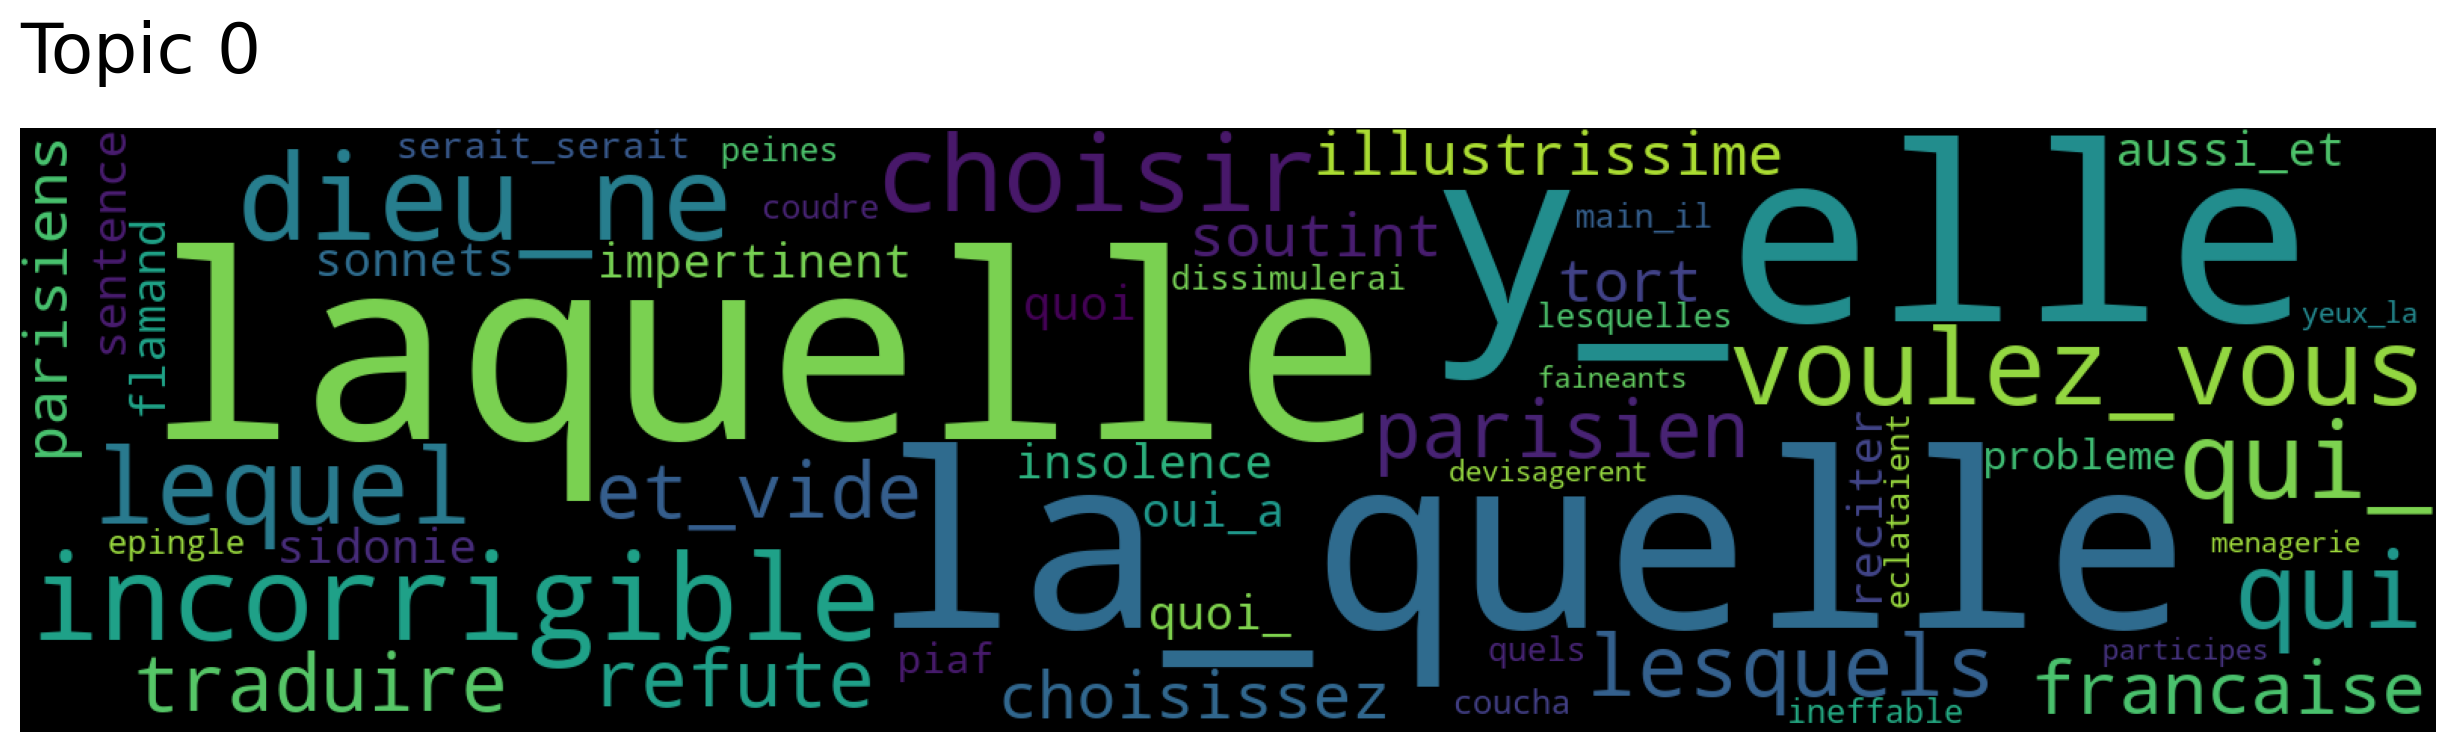

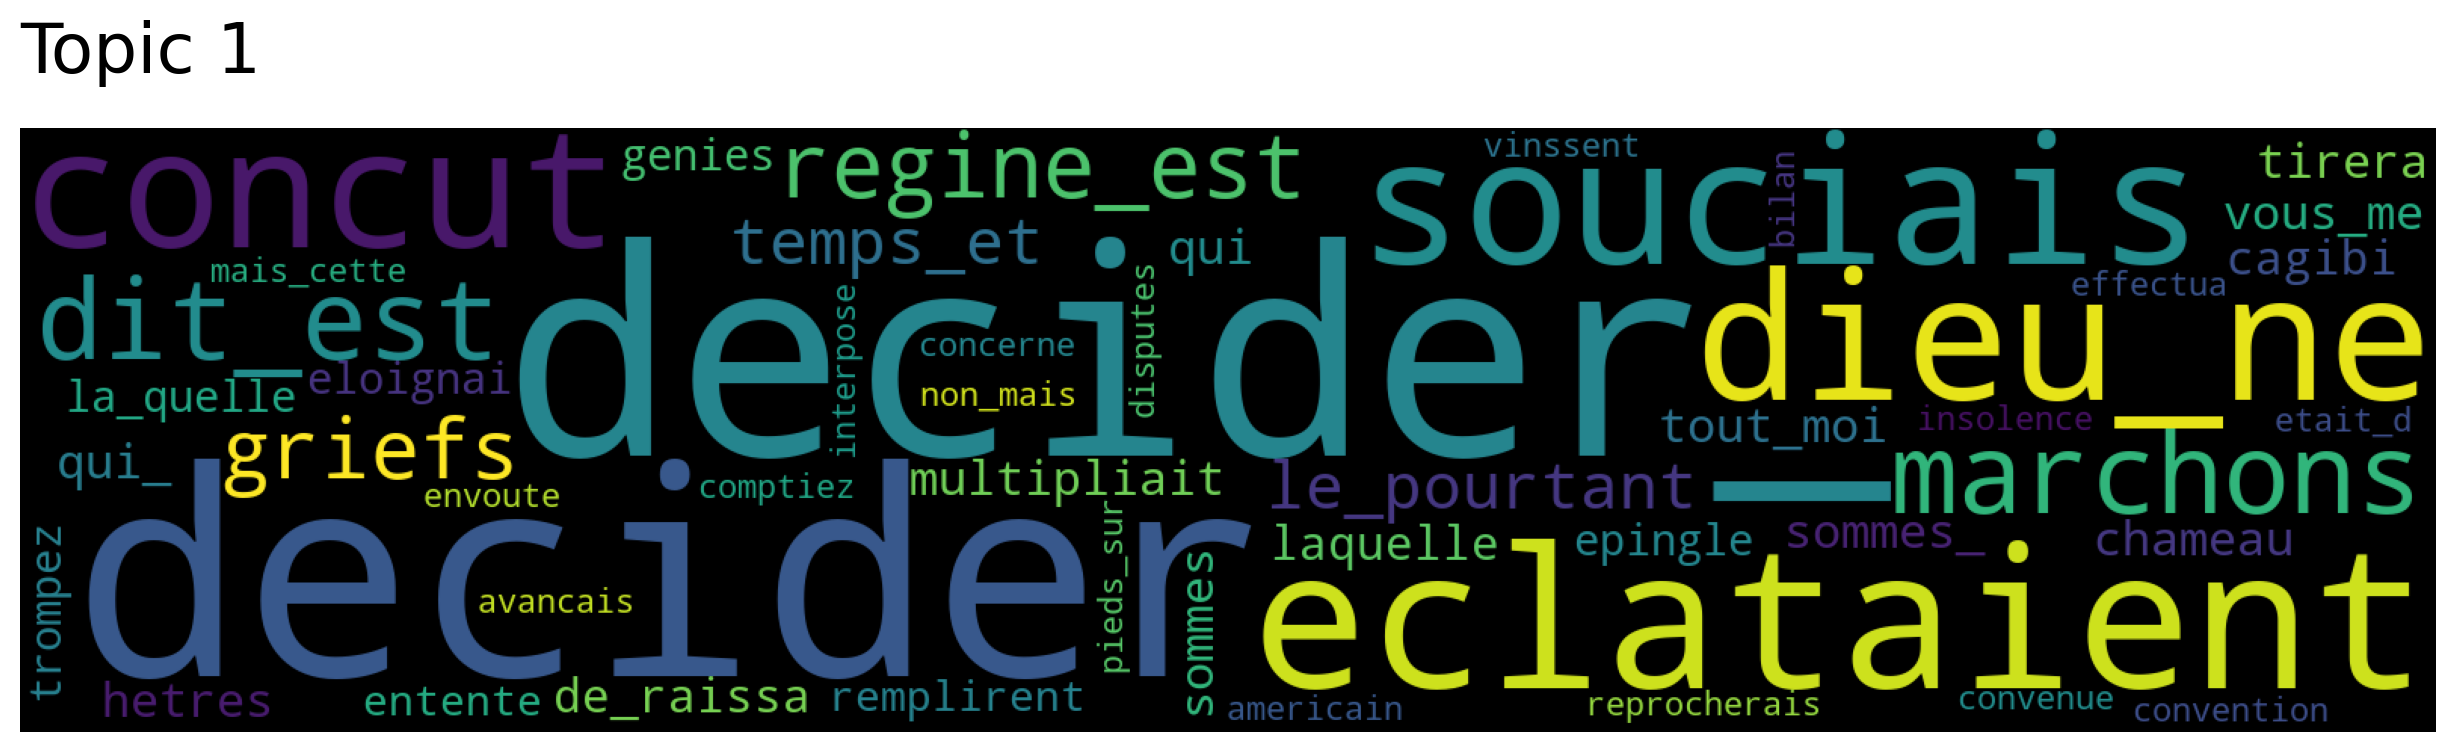

In [24]:
topic_sizes, topic_nums = model_male.get_topic_sizes()
for topic in topic_nums:
    model_male.generate_topic_wordcloud(topic)

In [52]:
topics, probs = topic_model.fit_transform(list_txt_female)

KeyboardInterrupt: 

In [ ]:
topic_model.visualize_barchart()

In [ ]:
model_male = Top2Vec(documents=list_txt_male, min_count=5, embedding_model='universal-sentence-encoder')

In [ ]:
model_male.get_num_topics()

In [ ]:
topic_sizes, topic_nums = model_male.get_topic_sizes()
for topic in topic_nums:
    model_male.generate_topic_wordcloud(topic)

In [ ]:
model_female = Top2Vec(documents=list_txt_female, min_count=1, embedding_model='universal-sentence-encoder')

In [ ]:
model_female.get_num_topics()

In [ ]:
topic_sizes, topic_nums = model_female.get_topic_sizes()
for topic in topic_nums:
    model_female.generate_topic_wordcloud(topic)